In [1]:
suppressMessages(library(RCurl)) # for downloading files
suppressMessages(library(dplyr)) # data manipulation
suppressMessages(library(gridExtra)) # for arranging plots
suppressMessages(library(ggplot2)) # plotting
suppressMessages(library(data.table)) # loading csv files
suppressMessages(library(RColorBrewer)) # for ColorBrewer palettes

In [2]:
# setting dmso pairwise scores data path
dmso_pairwise_scores <- file.path("./results/final_pairwise_scores.csv")
if (!file.exists(dmso_pairwise_scores)) {
  stop("Please run ./pairwise-compair.ipynb first to generate the pairwise scores.")
}

# setting trt pairwise scores data path
trt_pairwise_scores <- file.path("./results/final_trt_pairwise_scores.csv")
if (!file.exists(trt_pairwise_scores)) {
  stop("Please run ./pairwise-compair.ipynb first to generate the pairwise scores.")
}

# creating a figures directory in the results folder
plot_output_dir <- "./results/figures"
if (!dir.exists(plot_output_dir)) {
  dir.create(plot_output_dir, recursive = TRUE)
}


## Creating a histogram of the pairwise compare scores with only controls

In [3]:
# loading csv files
dmso_pairwise_df <- fread(dmso_pairwise_scores)
trt_pairwise_df <- fread(trt_pairwise_scores)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


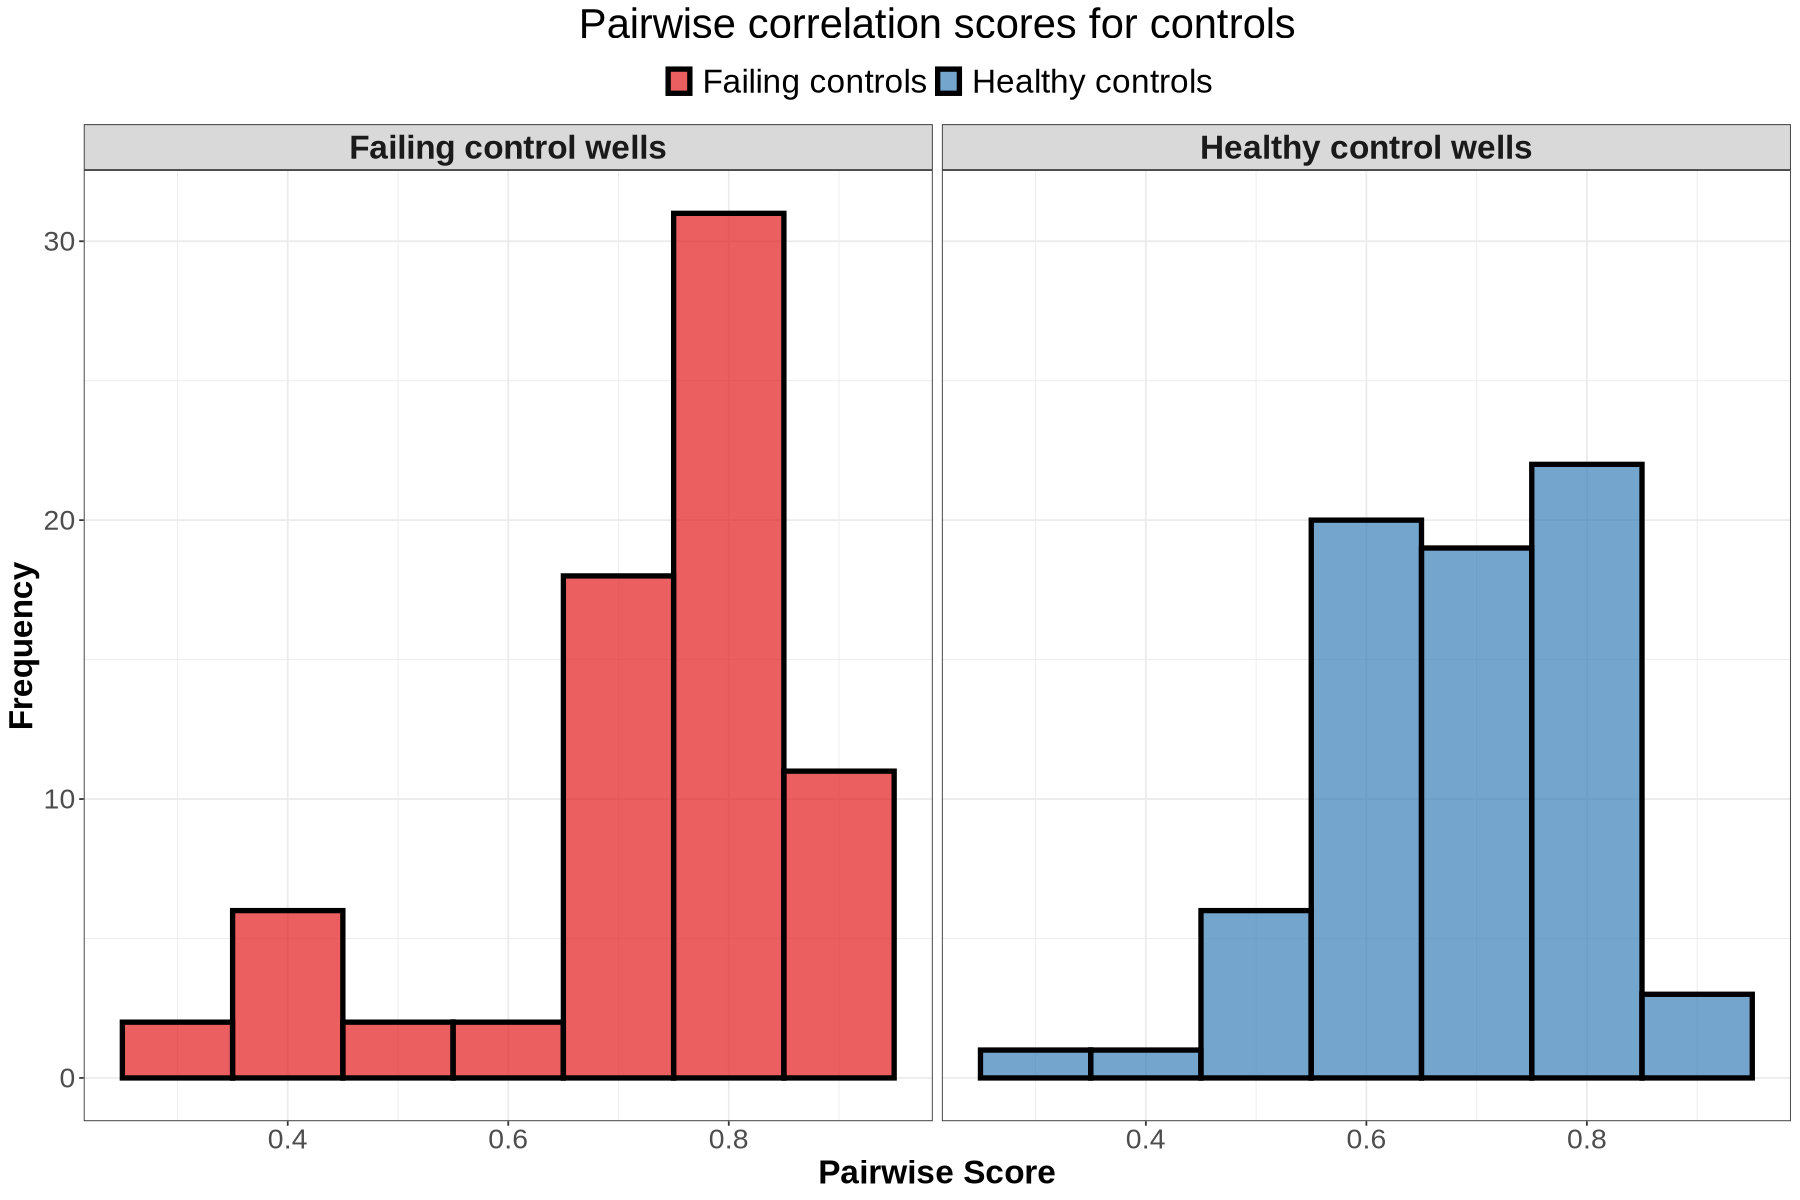

In [4]:
# setting the figure size for the notebook
width <- 15
height <- 10
options(repr.plot.width = width ,repr.plot.height = height)

# creating a histogram of the dmso pairwise scores using ggplot2 while
# creating a facet using the Metadata_treatment column and assigning colors
dmso_pairwise_histogram <- ggplot(dmso_pairwise_df, aes(x = pearsons_correlation, fill = Metadata_treatment)) +
     geom_histogram(binwidth = 0.1, color = "black", size = 1.5, alpha = 0.7) +
     
     # setting up the facet for the histogram
     # using the Metadata_treatment column to create two separate histograms
     # one for DMSO-negative and one for DMSO-positive
     facet_wrap(~Metadata_treatment, labeller = as_labeller(c(
          "DMSO-negative" = "Failing control wells",
          "DMSO-positive" = "Healthy control wells"
     ))) +
     
     # setting the color for the histogram bars
     # using the Metadata_treatment column to assign colors
     scale_fill_manual(
          values = brewer.pal(3, "Set1")[1:2], # using ColorBrewer palette
          labels = c("DMSO-negative" = "Failing controls", "DMSO-positive" = "Healthy controls")
     ) +

     # setting the x and y axis limits
     # scale_x_continuous(breaks = seq(0, 1, by = 0.2)) +
     # scale_y_continuous(breaks = seq(0, 100, by = 10)) +
     
     # adding labels and titles
     labs(
          title = "Pairwise correlation scores for controls",
          x = "Pairwise Score",
          y = "Frequency"
     ) +

     # setting the theme for the plot and 
     # adjusting the legend position and text size
     theme_bw() +
     theme(
          legend.position = "top",
          legend.title = element_blank(),
          legend.text = element_text(size = 20),
          axis.text.x = element_text(size = 17),
          axis.text.y = element_text(size = 17),
          axis.title.x = element_text(size = 20, face = "bold"),
          axis.title.y = element_text(size = 20, face = "bold"),
          plot.title = element_text(hjust = 0.5, size = 25),
          strip.text = element_text(size = 20, face = "bold"),
     ) 

# save plot into figures directory
ggsave(
     filename = file.path(plot_output_dir, "dmso_pairwise_histogram.png"),
     plot = dmso_pairwise_histogram,
     width = 15,
     height = 10,
     dpi = 300
)

dmso_pairwise_histogram


## Creating box plot 

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”


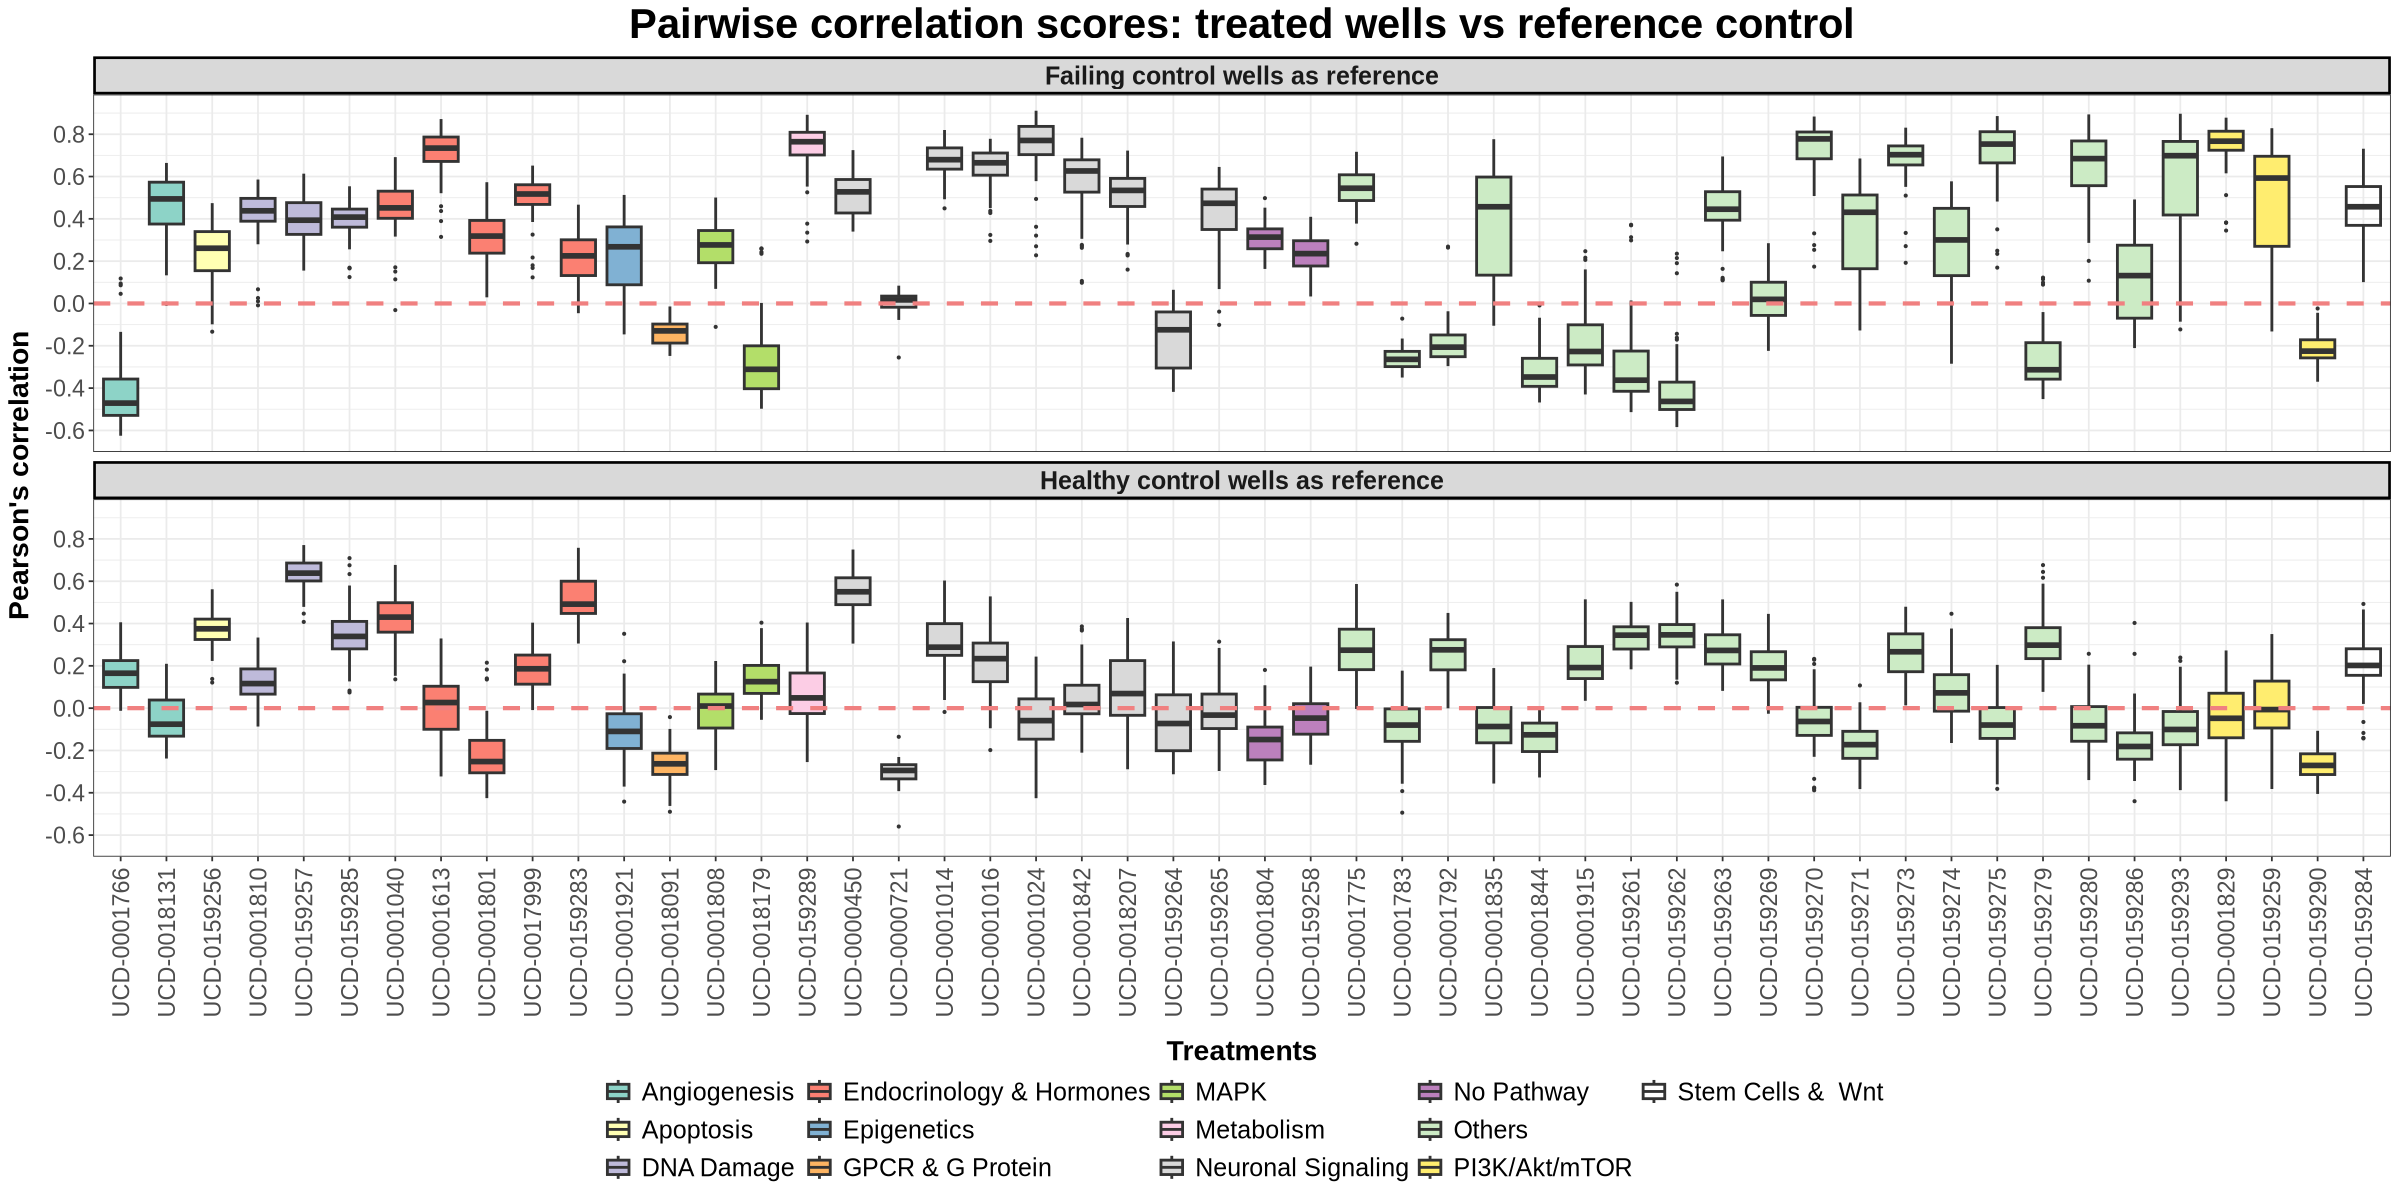

In [5]:
# Reordering Metadata_treatment based on the order of Metadata_Pathway
trt_pairwise_df$Metadata_treatment <- factor(trt_pairwise_df$Metadata_treatment, 
                                             levels = unique(trt_pairwise_df$Metadata_treatment[order(trt_pairwise_df$Metadata_Pathway)]))

# setting figure size for the notebook
width <- 20
height <- 10
options(repr.plot.width = width ,repr.plot.height = height)

# creating a boxplot of the dataset using ggplot2
pairwise_score_boxplot <- ggplot(trt_pairwise_df, aes(x = Metadata_treatment, y = pearsons_correlation, fill = Metadata_Pathway)) +
    geom_boxplot(outlier.size = 0.5, linewidth = .8) +  # Increased edge thickness of the boxplot
    
    # adding a light red horizontal line at y = 0
    geom_hline(yintercept = 0, color = "lightcoral", linetype = "dashed", linewidth = 1.2) +
    
    # setting up the facet for the boxplot
    # using the reference column to create separate boxplots
    facet_wrap(~reference, ncol = 1, labeller = as_labeller(c(
        "Healthy" = "Healthy control wells as reference",
        "Failing" = "Failing control wells as reference"
    ))) +
    
    # setting the color for the boxplot bars
    # using the Metadata_Pathway column to assign colors
    scale_fill_brewer(palette = "Set3") +

    # adding labels and titles
    labs(
        title = "Pairwise correlation scores: treated wells vs reference control",
        x = "Treatments",
        y = "Pearson's correlation"
    ) +

    # setting the y-axis ticks with separation of 0.2
    scale_y_continuous(breaks = seq(-1, 1, by = 0.2)) +

    # setting the theme for the plot and 
    # adjusting the legend position and text size
    theme_bw() +
    theme(
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 15),
        axis.text.x = element_text(size = 14, angle = 90, vjust = .5), 
        axis.text.y = element_text(size = 14), 
        axis.title.x = element_text(size = 17, face = "bold", vjust = -1.7),
        axis.title.y = element_text(size = 17, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 25,face = "bold"),
        strip.text = element_text(size = 15, face = "bold"),
        strip.background = element_rect(color = "black", size = 1.5) 
    ) 

# save plot into figures directory
ggsave(
    filename = file.path(plot_output_dir, "trt_pairwise_boxplot.png"),
    plot = pairwise_score_boxplot,
    width = 20,
    height = 10,
    dpi = 300
)

pairwise_score_boxplot